<a href="https://colab.research.google.com/github/rihannh/GDG-Unsri-Machine-Learning-Task-NN/blob/main/fashion_mnist_%5BRihan_Naufaldihanif%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Image Classifier with Regularization
- Author: Muhammad Aditya Bayhaqie, Eva Theresia Pardede , Rihan Naufaldihanif
- Session: Building Neural Network using MNIST

## Objective
Build a Dense Neural Network (MLP) to classify clothing items in the Fashion MNIST dataset using:
- Dropout
- Batch Normalization
- EarlyStopping
- Learning rate tuning

### Guidelines
- Complete the notebook by filling in the missing code sections.
- Do NOT use CNNs. Only Dense layers allowed.
- Accuracy goal: **≥ 90% on test data**
- Use best practices in model design and training.

## Problem Definition

In this session, we aim to build a simple image classifier using a dense neural network (MLP) to recognize Apparel from the MNIST dataset.

Why choose this Dataset and Algorithm?
- It’s a classic starter problem for deep learning.
- Easy to visualize and evaluate.
- Teaches foundational skills like preprocessing, model design, and evaluation.

## Data Collection

### Data Collection

We use the MNIST dataset, available directly from Keras.

In [1]:
# Load dataset
# TODO: Load the dataset using keras.datasets

from tensorflow.keras.datasets import fashion_mnist

# Your code here:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training shape: {x_train.shape}, Test shape: {x_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28), Test shape: (10000, 28, 28)


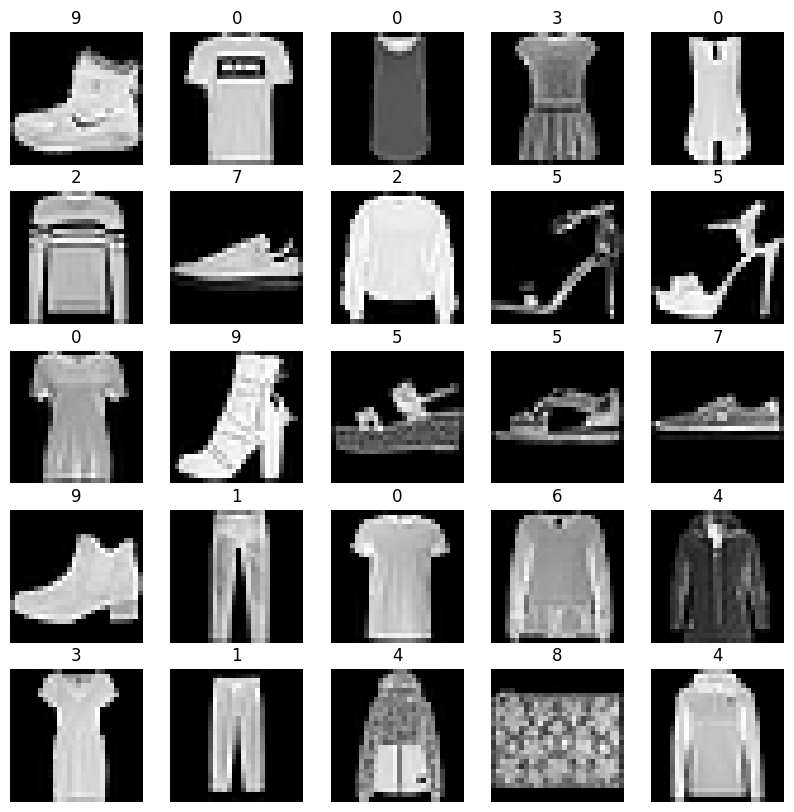

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Data Preprocessing

### Data Preprocessing

Steps:
- Normalize pixel values to [0, 1]
- Flatten images from (28, 28) to (784,)
- One-hot encode the labels

In [3]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# TODO: Normalize, flatten, and one-hot encode

# Your code here:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

## Model Building

We use a simple MLP with:
- Use `Sequential` model
- 2+ hidden layers with `ReLU`
- Use `BatchNormalization` and `Dropout`
- Output layer with 10 units and `softmax

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# TODO: Build the model using Sequential API

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu', name='hidden_layer_2'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

Compile the Model

Instructions:
- Use `Adam` optimizer
- Try learning rate: `0.0005` / `5e-4`
- Use `categorical_crossentropy` loss

In [15]:
from tensorflow.keras.optimizers import Adam

# TODO: Compile the model with appropriate settings

model.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training & Evaluation

### Requirements:
- Use `validation_split=0.2`
- Add `EarlyStopping` with `patience=3`
- Train for up to 30 epochs

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# TODO: Train the model

history = model.fit(
    x_train, y_train_cat,
    epochs=30,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stop]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7456 - loss: 0.7438 - val_accuracy: 0.8473 - val_loss: 0.4298
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8374 - loss: 0.4511 - val_accuracy: 0.8587 - val_loss: 0.4004
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8505 - loss: 0.4145 - val_accuracy: 0.8607 - val_loss: 0.3736
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8602 - loss: 0.3812 - val_accuracy: 0.8733 - val_loss: 0.3542
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8666 - loss: 0.3661 - val_accuracy: 0.8708 - val_loss: 0.3583
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8669 - loss: 0.3605 - val_accuracy: 0.8769 - val_loss: 0.3324
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8789 - loss: 0.3411 - val_accuracy: 0.8729 - val_loss: 0.3564
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8771 - loss: 0

Evaluate the trained model on the test dataset.

In [17]:
# TODO: Evaluate model

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8774 - loss: 0.3424
Test Accuracy: 0.8767


### Plot Accuracy

Plot training and validation accuracy curves.

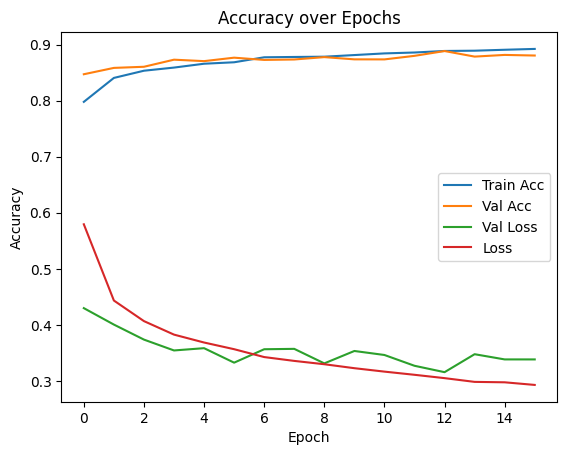

In [18]:
import matplotlib.pyplot as plt

# TODO: Plot accuracy

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['loss'], label='Loss')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Submission Instructions

- Save your notebook with your name: `fashion_mnist_[YourName].ipynb`
- Upload to your Github.
- Ensure the following:
  - Model achieves at least 90% test accuracy
  - Model uses regularization: Dropout + BatchNorm + EarlyStopping
  - Code is clean and commented

Deadline: 21 May 2025
